Some quick visualizations of the model output

In [19]:
#high level modules
import os
import sys
import imp
import numpy as np
import pandas as pd
import pickle

# ml/ai modules
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# import pydot
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors

# custom modules
this_dir = "/Users/steeleb/Documents/GitHub/ATS-ML-Fall2023/"
imp.load_source("tvt", os.path.join(this_dir, "NeuralNetworks/preprocessing.py"))
from tvt import training
from tvt import train1, val1, train2, val2, train3, val3, train4, val4, train5, val5, train6, val6
from tvt import train1_ts, val1_ts, train2_ts, val2_ts, train3_ts, val3_ts, train4_ts, val4_ts
imp.load_source("universals", os.path.join(this_dir, "NeuralNetworks/universal_functions.py"))
from universals import load_pickle_file, get_features_labels, predict_values, print_error_metrics
imp.load_source("vis", os.path.join(this_dir, "NeuralNetworks/vis_functions.py"))
from vis import create_scatter_plot



Load in models from pickle files

In [20]:
# model directory path
model_dir = '/Users/steeleb/OneDrive - Colostate/NASA-Northern/data/NN_train_val_test/models/leaky_overfit/'

histories = [f for f in os.listdir(model_dir) if 'history' in f]

ts_histories = [f for f in histories if 'ts' in f]
ts_histories.sort()

histories = [f for f in histories if 'ts' not in f]
histories.sort()

ts_history_1 = load_pickle_file(ts_histories[0], model_dir)
ts_history_2 = load_pickle_file(ts_histories[1], model_dir)
ts_history_3 = load_pickle_file(ts_histories[2], model_dir)
ts_history_4 = load_pickle_file(ts_histories[3], model_dir)

history_1 = load_pickle_file(histories[0], model_dir)
history_2 = load_pickle_file(histories[1], model_dir)
history_3 = load_pickle_file(histories[2], model_dir)
history_4 = load_pickle_file(histories[3], model_dir)
history_5 = load_pickle_file(histories[4], model_dir)
history_6 = load_pickle_file(histories[5], model_dir)


And now we'll look at the training and validation loss and accuracy for each model

Text(0.5, 0.98, 'LOO dataset 1')

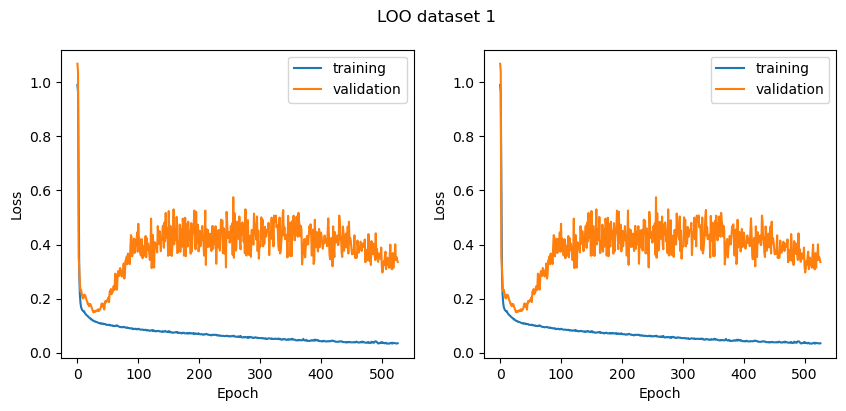

In [21]:
fig1, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_1.history["loss"], label="training")
axs[0].plot(history_1.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_1.history["loss"], label="training")
axs[1].plot(history_1.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig1.suptitle("LOO dataset 1")


Text(0.5, 0.98, 'LOO dataset 2')

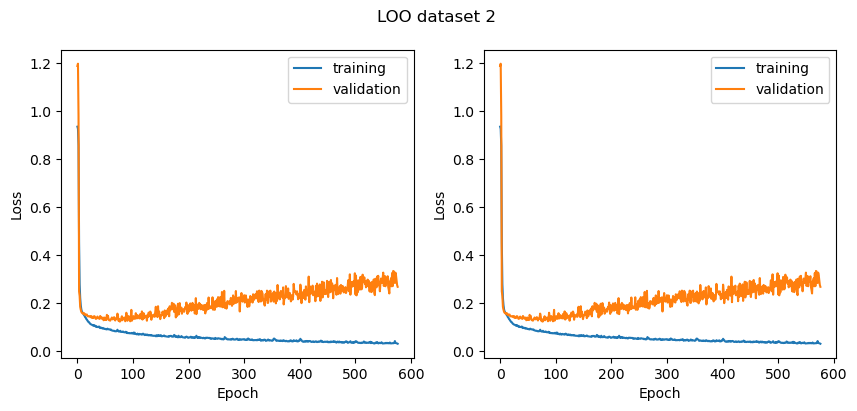

In [22]:
fig2, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_2.history["loss"], label="training")
axs[0].plot(history_2.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_2.history["loss"], label="training")
axs[1].plot(history_2.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig2.suptitle("LOO dataset 2")

Text(0.5, 0.98, 'LOO dataset 3')

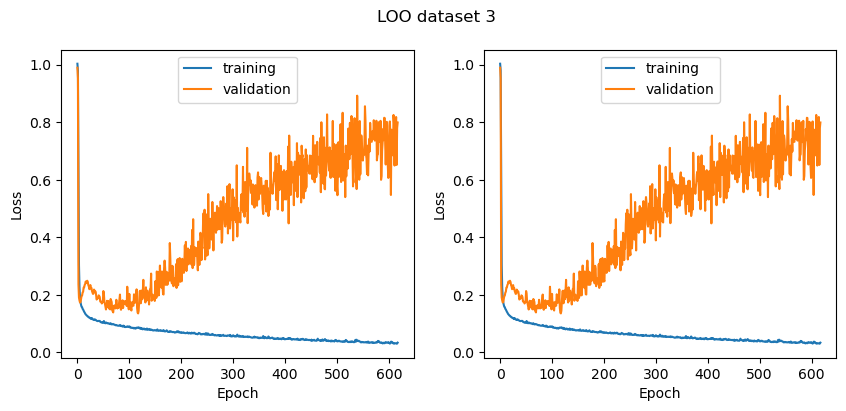

In [23]:
fig3, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_3.history["loss"], label="training")
axs[0].plot(history_3.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_3.history["loss"], label="training")
axs[1].plot(history_3.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig3.suptitle("LOO dataset 3")

Text(0.5, 0.98, 'LOO dataset 4')

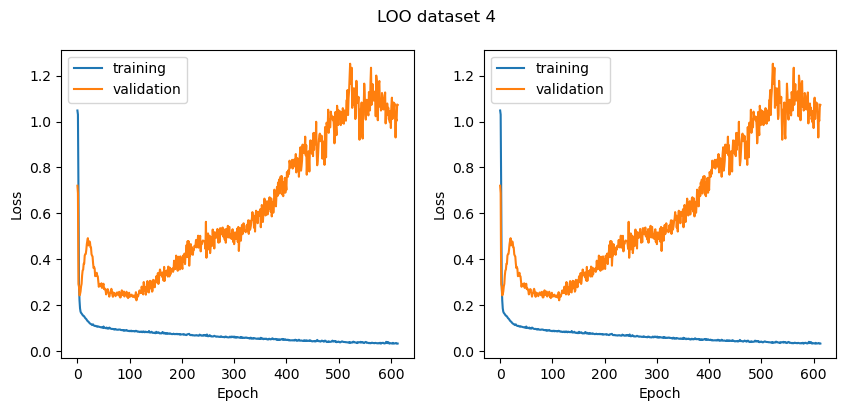

In [24]:
fig4, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_4.history["loss"], label="training")
axs[0].plot(history_4.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_4.history["loss"], label="training")
axs[1].plot(history_4.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig4.suptitle("LOO dataset 4")

Text(0.5, 0.98, 'LOO dataset 5')

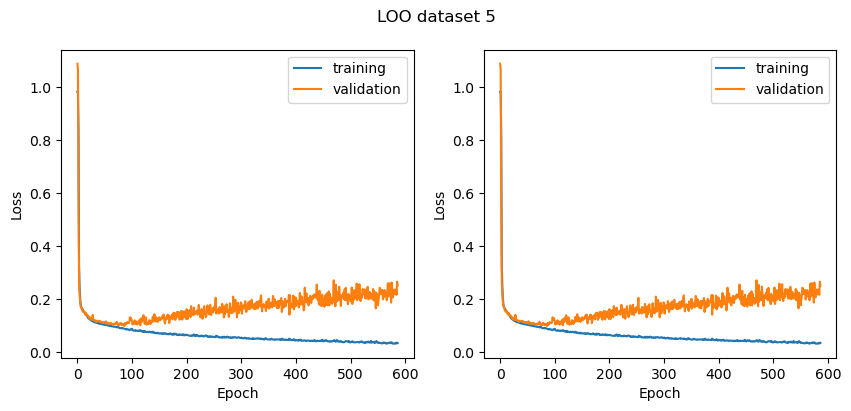

In [25]:
fig5, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_5.history["loss"], label="training")
axs[0].plot(history_5.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_5.history["loss"], label="training")
axs[1].plot(history_5.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig5.suptitle("LOO dataset 5")


Text(0.5, 0.98, 'LOO dataset 6')

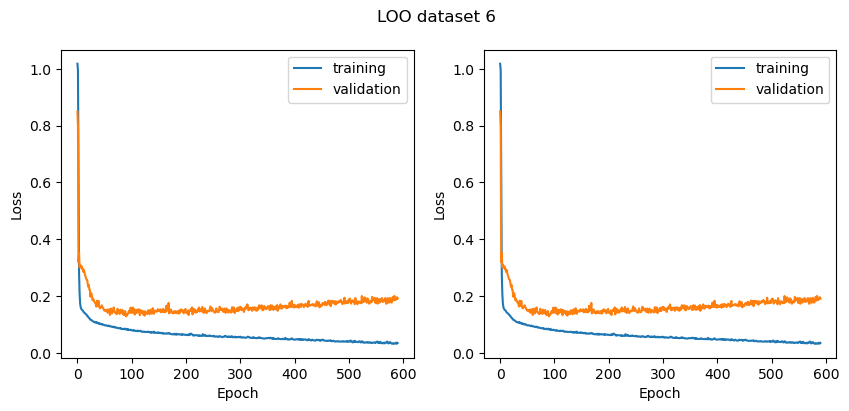

In [26]:
fig6, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history_6.history["loss"], label="training")
axs[0].plot(history_6.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(history_6.history["loss"], label="training")
axs[1].plot(history_6.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig6.suptitle("LOO dataset 6")


Text(0.5, 0.98, 'TS dataset 1')

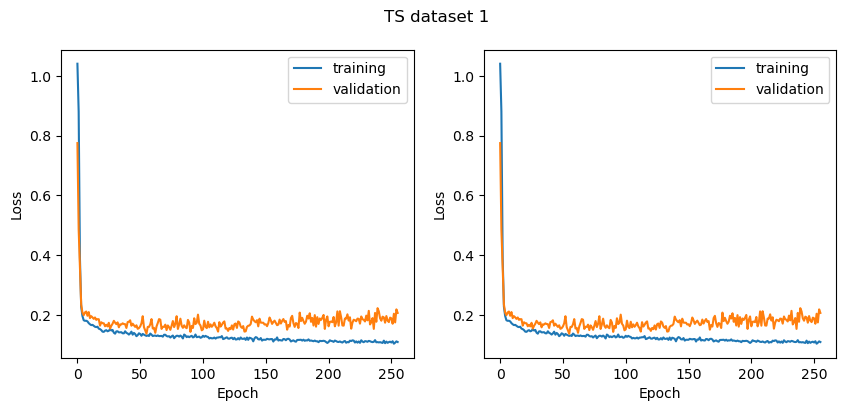

In [27]:
fig1ts, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(ts_history_1.history["loss"], label="training")
axs[0].plot(ts_history_1.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(ts_history_1.history["loss"], label="training")
axs[1].plot(ts_history_1.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig1ts.suptitle("TS dataset 1")


Text(0.5, 0.98, 'TS dataset 2')

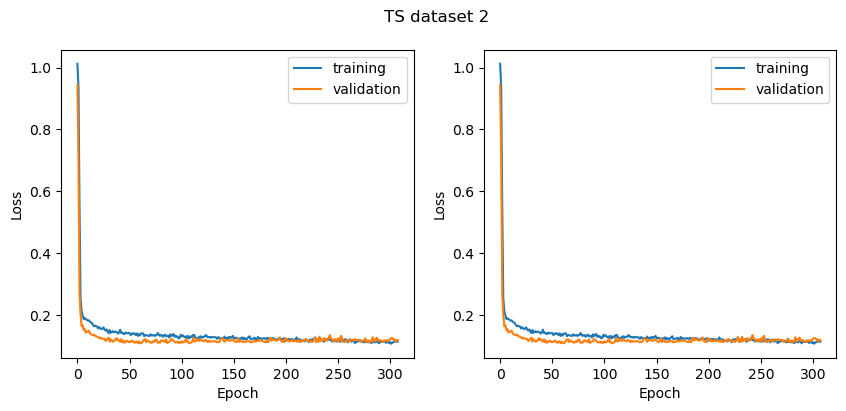

In [28]:
fig2ts, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(ts_history_2.history["loss"], label="training")
axs[0].plot(ts_history_2.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(ts_history_2.history["loss"], label="training")
axs[1].plot(ts_history_2.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig2ts.suptitle("TS dataset 2")

Text(0.5, 0.98, 'TS dataset 3')

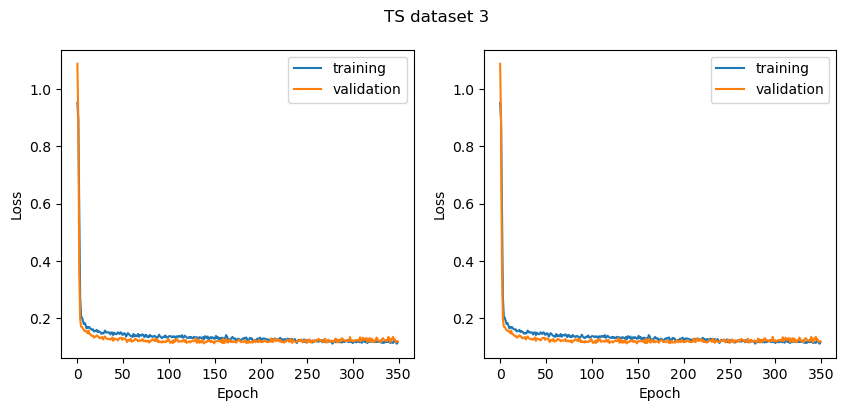

In [29]:
fig3ts, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(ts_history_3.history["loss"], label="training")
axs[0].plot(ts_history_3.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(ts_history_3.history["loss"], label="training")
axs[1].plot(ts_history_3.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig3ts.suptitle("TS dataset 3")

Text(0.5, 0.98, 'TS dataset 4')

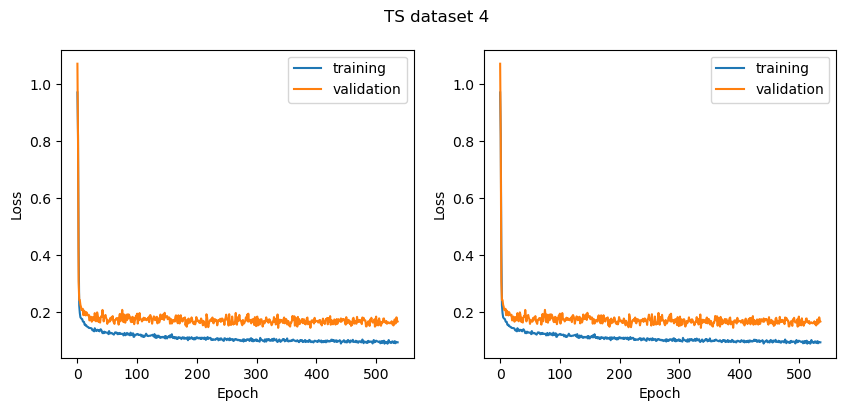

In [30]:
fig4ts, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(ts_history_4.history["loss"], label="training")
axs[0].plot(ts_history_4.history["val_loss"], label="validation")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(ts_history_4.history["loss"], label="training")
axs[1].plot(ts_history_4.history["val_loss"], label="validation")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()

fig4ts.suptitle("TS dataset 4")

Import data, models and look at actual values

In [31]:
features1, labels_1, val_features1, val_labels_1 = get_features_labels(train1, val1)
features2, labels_2, val_features2, val_labels_2 = get_features_labels(train2, val2)
features3, labels_3, val_features3, val_labels_3 = get_features_labels(train3, val3)
features4, labels_4, val_features4, val_labels_4 = get_features_labels(train4, val4)
features5, labels_5, val_features5, val_labels_5 = get_features_labels(train5, val5)
features6, labels_6, val_features6, val_labels_6 = get_features_labels(train6, val6)

ts_features1, ts_labels_1, ts_val_features1, ts_val_labels_1 = get_features_labels(train1_ts, val1_ts)
ts_features2, ts_labels_2, ts_val_features2, ts_val_labels_2 = get_features_labels(train2_ts, val2_ts)
ts_features3, ts_labels_3, ts_val_features3, ts_val_labels_3 = get_features_labels(train3_ts, val3_ts)
ts_features4, ts_labels_4, ts_val_features4, ts_val_labels_4 = get_features_labels(train4_ts, val4_ts)


In [32]:
models = [f for f in os.listdir(model_dir) if 'history' not in f]

ts_models = [f for f in models if 'ts' in f]
ts_models.sort()

models = [f for f in models if 'ts' not in f]
models.sort()

ts_model_1 = load_pickle_file(ts_models[0], model_dir)
ts_model_2 = load_pickle_file(ts_models[1], model_dir)
ts_model_3 = load_pickle_file(ts_models[2], model_dir)
ts_model_4 = load_pickle_file(ts_models[3], model_dir)

model_1 = load_pickle_file(models[0], model_dir)
model_2 = load_pickle_file(models[1], model_dir)
model_3 = load_pickle_file(models[2], model_dir)
model_4 = load_pickle_file(models[3], model_dir)
model_5 = load_pickle_file(models[4], model_dir)
model_6 = load_pickle_file(models[5], model_dir)

In [33]:
transform = pd.read_csv('/Users/steeleb/OneDrive - Colostate/NASA-Northern/data/NN_train_val_test/mean_std_training_v2023-11-09.csv')
transform.set_index(transform.columns[0], inplace=True)

t_mean = transform.loc['value']['mean']
t_std = transform.loc['value']['std']


In [34]:

# Call predict_values for each dataset
p_act_1, l_act_1, p_v_act_1, l_v_act_1 = predict_values(model_1, features1, val_features1, labels_1, val_labels_1, t_mean, t_std)
p_act_2, l_act_2, p_v_act_2, l_v_act_2 = predict_values(model_2, features2, val_features2, labels_2, val_labels_2, t_mean, t_std)
p_act_3, l_act_3, p_v_act_3, l_v_act_3 = predict_values(model_3, features3, val_features3, labels_3, val_labels_3, t_mean, t_std)
p_act_4, l_act_4, p_v_act_4, l_v_act_4 = predict_values(model_4, features4, val_features4, labels_4, val_labels_4, t_mean, t_std)
p_act_5, l_act_5, p_v_act_5, l_v_act_5 = predict_values(model_5, features5, val_features5, labels_5, val_labels_5, t_mean, t_std)
p_act_6, l_act_6, p_v_act_6, l_v_act_6 = predict_values(model_6, features6, val_features6, labels_6, val_labels_6, t_mean, t_std)

p_act_1_ts, l_act_1_ts, p_v_act_1_ts, l_v_act_1_ts = predict_values(ts_model_1, ts_features1, ts_val_features1, ts_labels_1, ts_val_labels_1, t_mean, t_std)
p_act_2_ts, l_act_2_ts, p_v_act_2_ts, l_v_act_2_ts = predict_values(ts_model_2, ts_features2, ts_val_features2, ts_labels_2, ts_val_labels_2, t_mean, t_std)
p_act_3_ts, l_act_3_ts, p_v_act_3_ts, l_v_act_3_ts = predict_values(ts_model_3, ts_features3, ts_val_features3, ts_labels_3, ts_val_labels_3, t_mean, t_std)
p_act_4_ts, l_act_4_ts, p_v_act_4_ts, l_v_act_4_ts = predict_values(ts_model_4, ts_features4, ts_val_features4, ts_labels_4, ts_val_labels_4, t_mean, t_std)


 1/10 [==>...........................] - ETA: 0s

2023-11-10 10:29:54.040803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/20 [>.............................] - ETA: 0s

2023-11-10 10:29:54.305735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/12 [=>............................] - ETA: 0s

2023-11-10 10:29:54.560738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/11 [=>............................] - ETA: 0s

2023-11-10 10:29:54.827150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/14 [=>............................] - ETA: 0s

2023-11-10 10:29:55.095864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/9 [==>...........................] - ETA: 0s

2023-11-10 10:29:55.362327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 2ms/step


2023-11-10 10:29:55.617903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 0s 2ms/step


2023-11-10 10:29:55.828671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 2ms/step


2023-11-10 10:29:56.037912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-10 10:29:56.168394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 1ms/step


2023-11-10 10:29:56.268513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


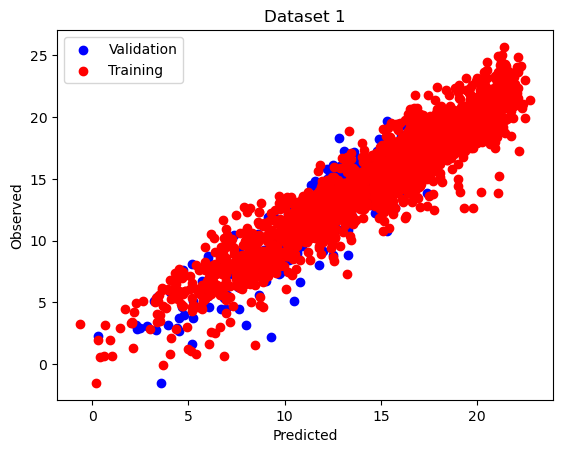

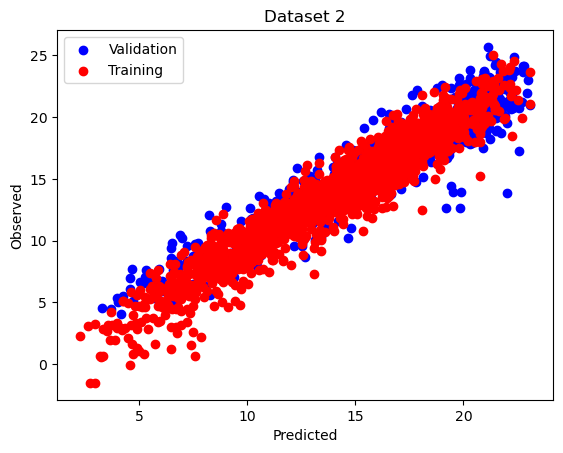

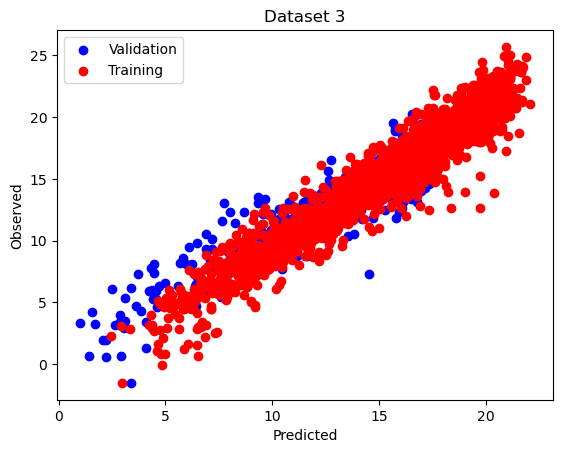

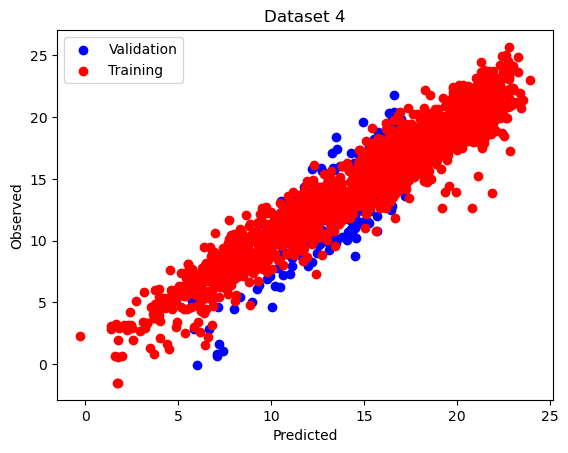

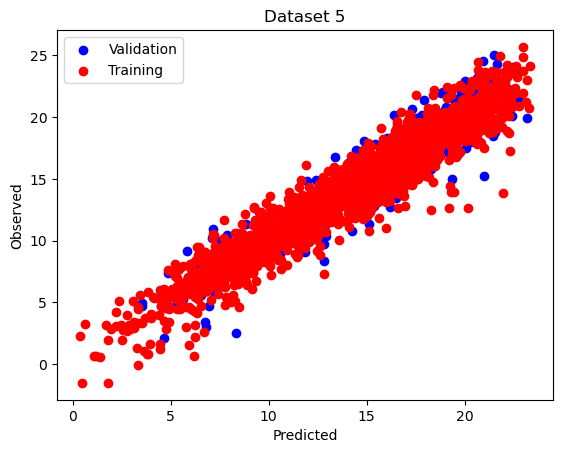

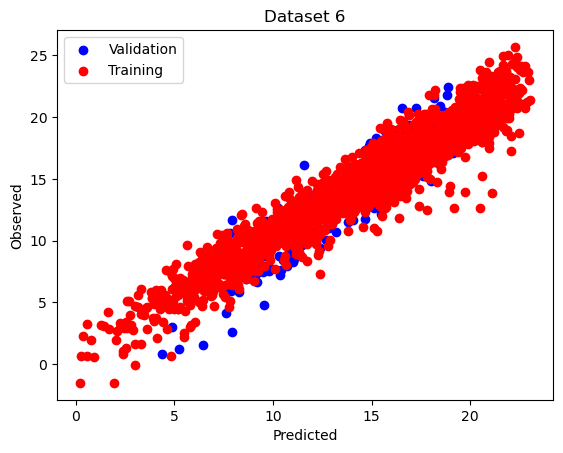

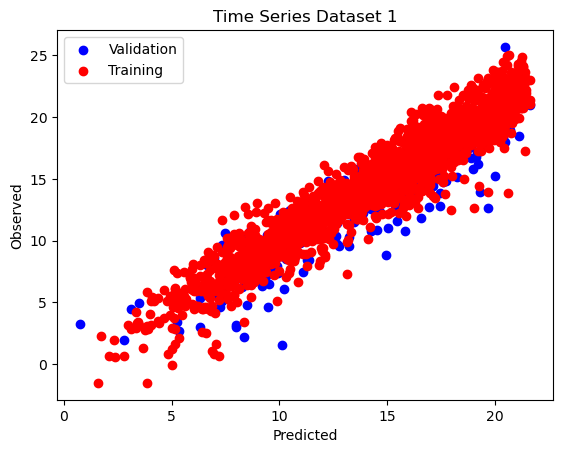

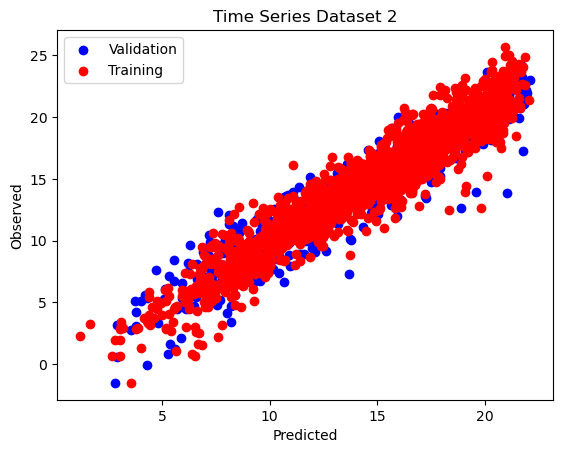

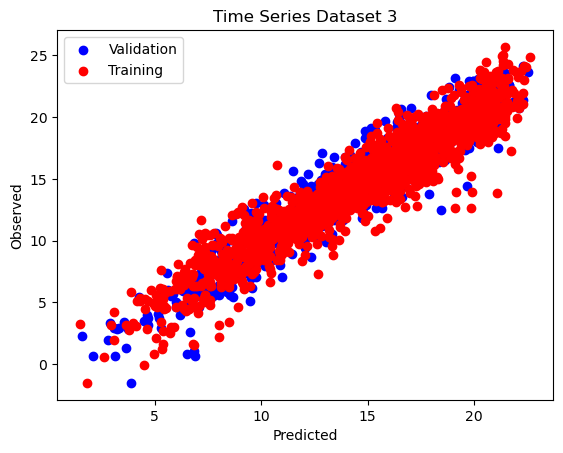

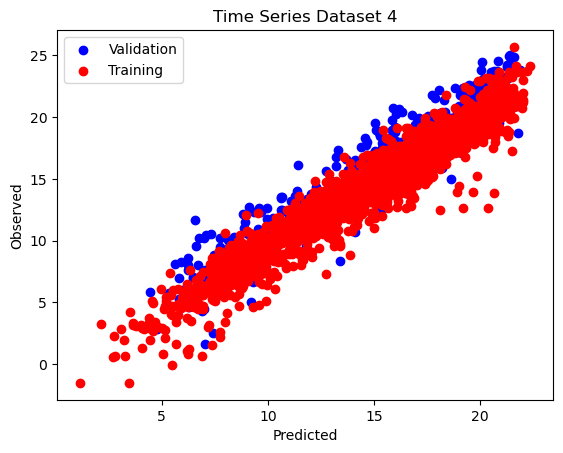

In [35]:
create_scatter_plot('Dataset 1',p_v_act_1, l_v_act_1, p_act_1, l_act_1)
create_scatter_plot('Dataset 2',p_v_act_2, l_v_act_2, p_act_2, l_act_2)
create_scatter_plot('Dataset 3',p_v_act_3, l_v_act_3, p_act_3, l_act_3)
create_scatter_plot('Dataset 4',p_v_act_4, l_v_act_4, p_act_4, l_act_4)
create_scatter_plot('Dataset 5',p_v_act_5, l_v_act_5, p_act_5, l_act_5)
create_scatter_plot('Dataset 6',p_v_act_6, l_v_act_6, p_act_6, l_act_6)

create_scatter_plot('Time Series Dataset 1',p_v_act_1_ts, l_v_act_1_ts, p_act_1_ts, l_act_1_ts)
create_scatter_plot('Time Series Dataset 2',p_v_act_2_ts, l_v_act_2_ts, p_act_2_ts, l_act_2_ts)
create_scatter_plot('Time Series Dataset 3',p_v_act_3_ts, l_v_act_3_ts, p_act_3_ts, l_act_3_ts)
create_scatter_plot('Time Series Dataset 4',p_v_act_4_ts, l_v_act_4_ts, p_act_4_ts, l_act_4_ts)

In [37]:
# loop through datasets 1-6
for i in range(1, 7):
    l_act = globals()["l_act_" + str(i)]
    p_act = globals()["p_act_" + str(i)]
    l_v_act = globals()["l_v_act_" + str(i)]
    p_v_act = globals()["p_v_act_" + str(i)]
    print_error_metrics(i, l_act, p_act, l_v_act, p_v_act)

# loop through time series datasets 1-4
for i in range(1, 5):
    ts_l_act = globals()["l_act_" + str(i) + "_ts"]
    ts_p_act = globals()["p_act_" + str(i) + "_ts"]
    ts_l_v_act = globals()["l_v_act_" + str(i) + "_ts"]
    ts_p_v_act = globals()["p_v_act_" + str(i) + "_ts"]
    print("TIME SERIES DATASET", i)
    print_error_metrics(i, ts_l_act, ts_p_act, ts_l_v_act, ts_p_v_act)


DATASET 1
Mean Squared Error for Training Dataset 1 : 2.717098049191869
Mean Absolute Error for Training Dataset 1 : 1.2794761042073728
Mean Squared Error for Validation Dataset 1 : 3.3990974823830182
Mean Absolute Error for Validation Dataset 1 : 1.4600749138069582
 
DATASET 2
Mean Squared Error for Training Dataset 2 : 1.9932838130148478
Mean Absolute Error for Training Dataset 2 : 1.084392699503014
Mean Squared Error for Validation Dataset 2 : 2.8106740150635945
Mean Absolute Error for Validation Dataset 2 : 1.2824670450711388
 
DATASET 3
Mean Squared Error for Training Dataset 3 : 2.1224215403770823
Mean Absolute Error for Training Dataset 3 : 1.1185791684982744
Mean Squared Error for Validation Dataset 3 : 3.089380250123343
Mean Absolute Error for Validation Dataset 3 : 1.3766085031252786
 
DATASET 4
Mean Squared Error for Training Dataset 4 : 2.0156466719261767
Mean Absolute Error for Training Dataset 4 : 1.09089758442373
Mean Squared Error for Validation Dataset 4 : 5.0171359112